In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import math
import os
import warnings
warnings.filterwarnings('ignore')


ModuleNotFoundError: No module named 'tensorflow'

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
df = pd.read_csv('TCS_stock_cleaned.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)
df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA200,Daily_return
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,NaN,NaN,NaN
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,NaN,NaN,-1.353915
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,NaN,NaN,-6.894351
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,NaN,NaN,0.000000
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,NaN,NaN,-0.239988


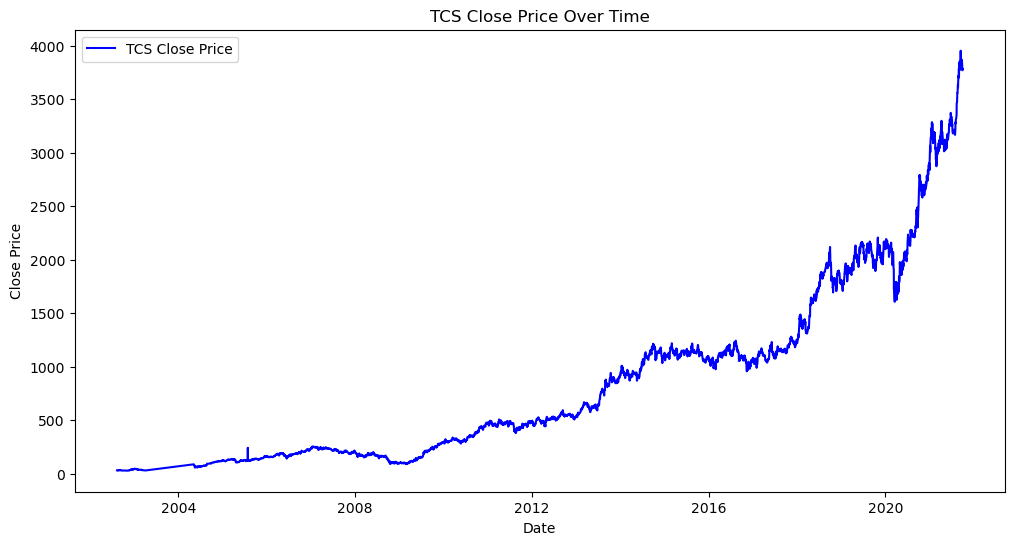

In [4]:
data = df[['Date', 'Close']]
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='TCS Close Price', color='blue')
plt.title('TCS Close Price Over Time')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.legend(); plt.show()


In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(data['Close']).reshape(-1,1))


In [6]:
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

print("Feature shape before reshape:", X.shape)
X = X.reshape(X.shape[0], X.shape[1], 1)
print("After reshape:", X.shape)


Feature shape before reshape: (4402, 60)
After reshape: (4402, 60, 1)


In [7]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (3521, 60, 1) Test: (881, 60, 1)


In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step,1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()
